# Milk Grading AI Classification Project

Welcome to my project. It aims to apply a number of machine learning techniques to a data set that predicts the quality of milk.

## Cleaning

This block of code contains all the imports that the project will need

In [ ]:
# installing some extra libraries for decision tree outputs
get_ipython().system('apt-get -qq install -y graphviz && pip install pydot')
!pip install six

import warnings # used in knn
import numpy as np # used for number manipulation
import pandas as pd # used for data manipulation - dataframes
import pydot # displaying decision tree
import io # file inputs and outputs

from google.colab import drive # file reading and writing from google drive
from IPython.display import Image # displaying the decision tree
from six import StringIO # displaying the decision tree
from pylab import rcParams # plotting correlation matrix
from matplotlib.colors import ListedColormap # plotting colour maps for knn

import matplotlib.pyplot as plt # used for plotting
import seaborn as sns # used for plotting correlation matrix

from sklearn import neighbors, preprocessing # nearest neighbours, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score # train test split for data and k fold scores
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn.preprocessing import StandardScaler # standard scalar
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #metrics - report, accuracy, matrix
from sklearn import svm, datasets, tree, metrics # decision tree, svm, metrics


This code will take in our original dataset and clean it for use in the project

In [ ]:
drive.mount('/content/gdrive') # connection the google drive
#reads from the file path the milk grading file
df = pd.read_csv("/content/gdrive/MyDrive/MachineLearning/MilkGrading.csv")
#displays the dataframe
df.head()

Mounted at /content/gdrive


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,1.0
1,6.6,36,0,1,0,1,253,1.0
2,8.5,70,1,1,1,1,246,0.0
3,9.5,34,1,1,0,1,255,0.0
4,6.6,37,0,0,0,0,255,0.5


A standard scalar is applied to the columns of ph, Temprature and Colour to make the data more consistent with each other.

In [ ]:
#initiates the scale
scale = StandardScaler()

#defines the data that needs to be scaled and scales it using built-in functions
X = df[['pH', 'Temprature', 'Colour']]
X = df[['pH', 'Temprature', 'Colour']] = scale.fit_transform(X = df[['pH', 'Temprature', 'Colour']])
#puts the other data in another dataframe so they can be combined without being scaled
y= df[['Taste', 'Odor', 'Fat ', 'Turbidity', 'Grade']]

#the scaled data is put in a dataframe
df1 = pd.DataFrame(X)
df1.columns=['pH', 'Temprature', 'Colour']

#the other data is put in another dataframe
df2 = pd.DataFrame(y)
df2.columns=['Taste', 'Odor', 'Fat ', 'Turbidity', 'Grade']

#the two dfs are added together and this is the data that will be used when applying techniques
df3 = pd.concat([df1, df2], axis=1, join='inner')
print(df3)

            pH  Temprature    Colour  Taste  Odor  Fat   Turbidity  Grade
0    -0.021531   -0.914107  0.501600      1     0     1          0    1.0
1    -0.021531   -0.815035  0.269333      0     1     0          1    1.0
2     1.336564    2.553438 -1.356536      1     1     1          1    0.0
3     2.051351   -1.013180  0.733867      1     1     0          1    0.0
4    -0.021531   -0.715962  0.733867      0     0     0          0    0.5
...        ...         ...       ...    ...   ...   ...        ...    ...
1054  0.049947    0.076620 -1.124269      1     1     0          0    0.5
1055  0.049947   -0.616889  0.733867      1     0     1          0    1.0
1056 -2.594765   -0.418744  0.733867      1     1     1          1    0.0
1057  0.121426   -0.121525 -0.427468      1     0     1          0    1.0
1058  1.408043    1.067347  0.733867      0     1     1          1    0.0

[1059 rows x 8 columns]


This a sample of the data that will be in the clean file. As you can see the order has changed and the pH, Temprature and Colour columns have been put on a standard scalar. Standardize features by removing the mean and scaling to unit variance.

 Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

 https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Checks for any null values in the data

In [ ]:
#no cleaning to do but this just verifies that there is no null values
print(df3.isnull().any())

pH            False
Temprature    False
Colour        False
Taste         False
Odor          False
Fat           False
Turbidity     False
Grade         False
dtype: bool


This block of code will upload the clean file to Google Drive

In [ ]:
# uploaded to google drive
df3.to_csv(("/content/gdrive/MyDrive/MachineLearning/MilkGradingClean.csv"))
print("Dataframe uploaded to GoogleDrive...")

Dataframe uploaded to GoogleDrive...


## Decision Tree

This bit of code will take the clean dataframe and continue on instead

In [ ]:
# df is made to equal df3 as it is what will be used for cleaning

df = df3
df.head()

,pH,Temprature,Colour,Taste,Odor,Fat,Turbidity,Grade
0,-0.021531,-0.914107,0.501600,1,0,1,0,1.0
1,-0.021531,-0.815035,0.269333,0,1,0,1,1.0
2,1.336564,2.553438,-1.356536,1,1,1,1,0.0
3,2.051351,-1.013180,0.733867,1,1,0,1,0.0
4,-0.021531,-0.715962,0.733867,0,0,0,0,0.5


This block of code will read in the clean file from Google Drive

In [ ]:
# the clean file can be read in instead
# the dataframe will be the same
df = pd.read_csv("/content/gdrive/MyDrive/MachineLearning/MilkGradingClean.csv")
# removes the numbers column on the left that were added by using dfs
df = df.iloc[: , 1:]
df.head()

,pH,Temprature,Colour,Taste,Odor,Fat,Turbidity,Grade
0,-0.021531,-0.914107,0.501600,1,0,1,0,1.0
1,-0.021531,-0.815035,0.269333,0,1,0,1,1.0
2,1.336564,2.553438,-1.356536,1,1,1,1,0.0
3,2.051351,-1.013180,0.733867,1,1,0,1,0.0
4,-0.021531,-0.715962,0.733867,0,0,0,0,0.5


Machine Learning Technique 1 will be creating the decision tree. The first step is to map our variables of 0, 0.5 and 1 to 0 , 1 and 2 so that the decision tree can read it.

In [ ]:
#map variables of float to int as decision trees need that as their final output
d = {1.0:2, 0.5: 1, 0.0: 0}
df['Grade'] = df['Grade'].map(d)
df.head()

,pH,Temprature,Colour,Taste,Odor,Fat,Turbidity,Grade
0,-0.021531,-0.914107,0.501600,1,0,1,0,2
1,-0.021531,-0.815035,0.269333,0,1,0,1,2
2,1.336564,2.553438,-1.356536,1,1,1,1,0
3,2.051351,-1.013180,0.733867,1,1,0,1,0
4,-0.021531,-0.715962,0.733867,0,0,0,0,1


All the column headings are taken for the tree to use.

In [ ]:
#a list is created of the headings
features = list(df.columns[:7])
features

['pH', 'Temprature', 'Colour', 'Taste', 'Odor', 'Fat ', 'Turbidity']

Creating the train test split here that is used in the decision tree and will also be implemented by the other techniques further down.

In [ ]:
#y is the final column or the desired output
y = df["Grade"]
#X is the rest of the columns
X = df[features]

#train test of 70/30 is created for X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

The decision tree is created and its accuracy will be output using the test data.

In [ ]:
#initilizes the decision tree
clf = tree.DecisionTreeClassifier()
#fits the training data on the tree
clf = clf.fit(X_train,y_train)
#gets a prediction of the tree using the test data
y_pred = clf.predict(X_test)
#gets an acccuracy score by comparing the test data to the predicted
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


The accuracy of the decison tree is almost perfect. This makes it a very effective method for determining the quality of milk.

This code will now take the decision tree created and out a visual representation of it

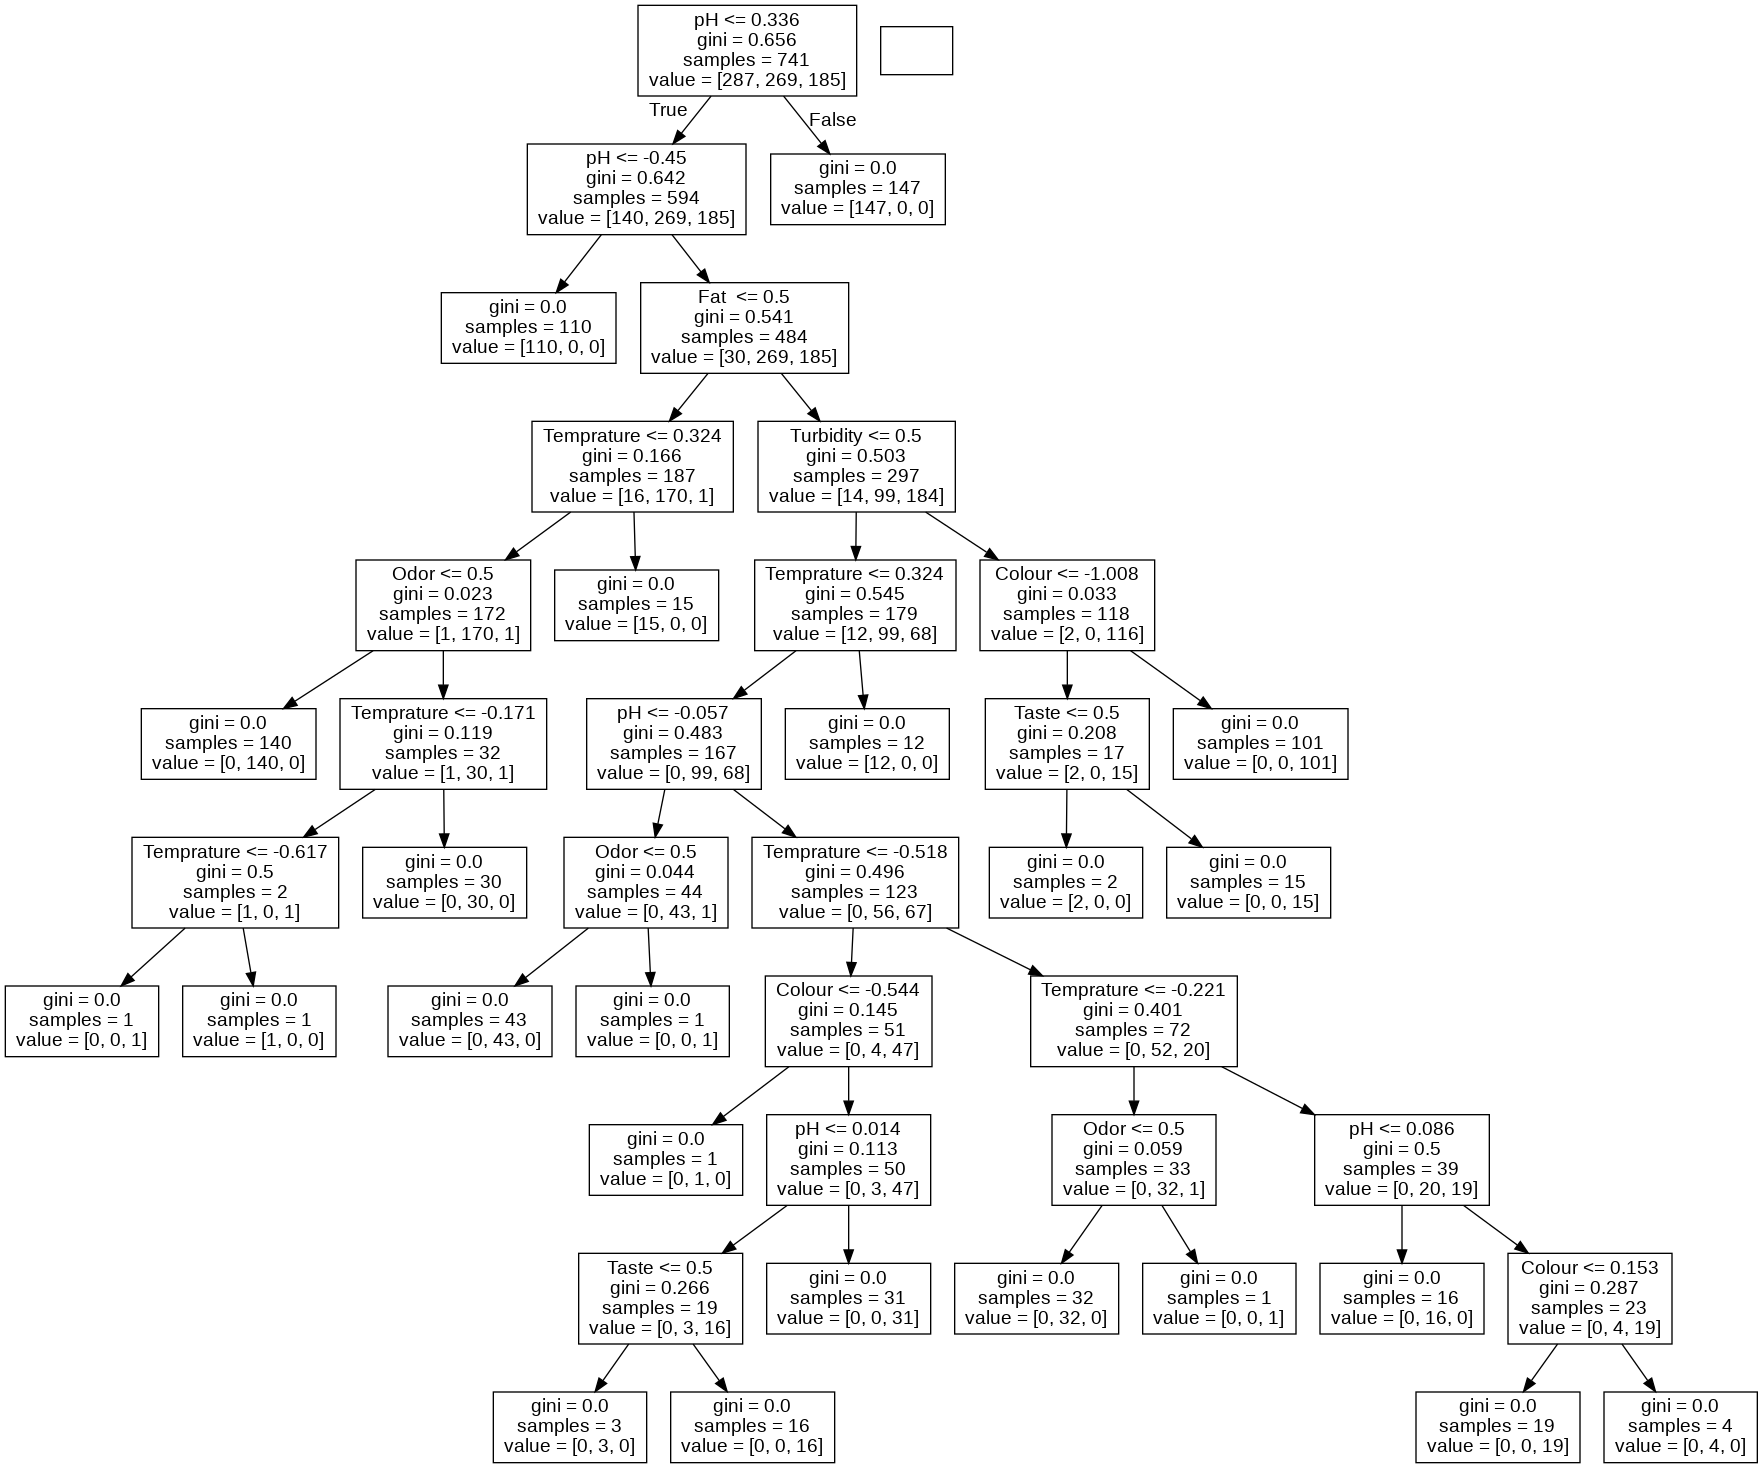

In [ ]:
#stringIO is used to to handle the input and output of data
# uses a file stream and is temporary storage or as long as it in use
dot_data = StringIO()
#creates the actual tree diagram
tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=features)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
#outputs the graph or tree as an image
Image(graph.create_png())

This the actual decision tree. There are quite a number of paths or leaves on the tree due to the amount of columns. An example of this decision tree would be the pH at the start. Straight away if the pH is too low or too acidic the milk would be spoiled and classified as bad, otherwise it would move on the next branch which again checks if the milk has too high of a pH or is too alkaline again that would make it bad. Then it goes to fat and fat splits yes or no inputs to temprature and turbidity and the cycle continues till it decides if the milk is good, moderate or bad.

The tree is complicated to look at but does make sense when you take time to examine it. It is something a human could make given enough time but would take a lot of time and would be based off small amounts of data and be difficult with each column added. By using machine learning on this dataset, a decision tree was constructed that took little time and works very effectively.

## Random Forest

Using the decision tree, a random forest classifier can also be used. A sample of the possible outputs will be displayed below.

In [ ]:
#initiates random forest and fits our inputs X or features columns and outputs y or the grade column
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X.values, y)

#sample output showing each of the possible outputs given data in.
print("Good Milk will have an output of 2")
print(features)
print("-0.02\t -0.7\t\t 0.7\t 1\t 1\t 1\t   1")#this is representation of the scaled data
print(clf.predict([[-0.02, -0.7, 0.7, 1, 1, 1, 1]]))#good
print("\nModerate Milk will have an output of 1")
print(features)
print("-0.02\t -0.7\t\t 0.7\t 0\t 0\t 0\t   0")#this is representation of the scaled data
print(clf.predict([[-0.02, -0.7, 0.7, 0, 0, 0, 0]]))#good
print("\nBad Milk will have an output of 0")
print(features)
print("2\t -1.1\t\t 0.7\t 1\t 1\t 0\t   1")#this is representation of the scaled data
print(clf.predict([[2, -1.1, 0.7, 1, 1, 0, 1]]))#good

Good Milk will have an output of 2
['pH', 'Temprature', 'Colour', 'Taste', 'Odor', 'Fat ', 'Turbidity']
-0.02	 -0.7		 0.7	 1	 1	 1	   1
[2]

Moderate Milk will have an output of 1
['pH', 'Temprature', 'Colour', 'Taste', 'Odor', 'Fat ', 'Turbidity']
-0.02	 -0.7		 0.7	 0	 0	 0	   0
[1]

Bad Milk will have an output of 0
['pH', 'Temprature', 'Colour', 'Taste', 'Odor', 'Fat ', 'Turbidity']
2	 -1.1		 0.7	 1	 1	 0	   1
[0]


If I chose to focus more on random forest, I would have applied an input for all the data with a javafx menu etc. The data would then be transformed from a pH value of 6.6 entered to -0.02 etc and given to the random forest to produce an output. But showing it working in concept was all I wanted for this project.

## K-Fold Cross Validation

The next technique to be covered will be K-fold cross validation. An SVC or support vector classifier is built using the train/test data and its accuracy is gotten and output

In [ ]:
#creates a linear kernel from the training data and outputs how well the test data compares to it
clf = svm.SVC(kernel = 'linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.89937106918239

Support vector classifier is created using svm and linear data from our train test and get an accuraacy of 0.899 which is quite a good model for predicting milk but may not be adequate for other data sets.

We now apply k-fold to the same data and get a number of folds scores and get the accuracy result.

In [ ]:
#creates a cross val with 5 folds based on the training data model created and
#checks it agaisnt the test data before getting the mean and outputting
scores = cross_val_score(clf, X_test, y_test, cv=5)
print(scores)
print(scores.mean())

[0.875      0.796875   0.90625    0.82539683 0.9047619 ]
0.861656746031746


Using the same linear kernel as above and applying our test data it but using k fold cross validation we get the average of 5 folds and get a mean accuracy of 0.86 which is worse than before but still not bad.

It wasn't as accurate when applying a linear kernel so a polynomial kernel should be used instead.

In [ ]:
#exact same as before except with a polynomaial kernel
clf = svm.SVC(kernel='poly', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)
scores = cross_val_score(clf, X_test, y_test, cv=5)
print(scores)
print(scores.mean())

[0.921875   0.84375    0.96875    0.85714286 0.93650794]
0.9056051587301587


By using a polynomial kernel with the data we get a better score than when using the linear likely due to the number of columns in the dataset. It is only slighlty better than the standard prediction using a linear kernel.

Apply the polynomial kernel to a simple train/test prediction

In [ ]:
#simple train test prediction on the poly kernel
clf.score(X_test, y_test)

0.9088050314465409

The result is the same as the cross validation score

## K Nearest Neighbour

The last method to be applied will be KNN. The first part of it will be applying the train test data to a KNN classifier to get accuracy scores for K

In [ ]:
# using the scalar we scale our fit our train data and then transform the train
#and test data to be used by the knn classifier
scale.fit(X_train)
X_train = scale.transform(X_train)
X_test = scale.transform(X_test)

#calls the knn classifier sets the amounts of neighbours
classifier = KNeighborsClassifier(n_neighbors=1)
#fits the data to be used
classifier.fit(X_train, y_train)
#predicts using the test data
y_pred = classifier.predict(X_test)

#outputs a confusion matrix
# as its not binary its 3x3 which means its the actual outputs of good, moderate,
# and bad the true output is the top and the predicted is the side
print(confusion_matrix(y_test, y_pred))
# classification report is output
print(classification_report(y_test, y_pred))
# the accuracy of the model is output
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[142   0   0]
 [  0 105   0]
 [  0   0  71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00        71

    accuracy                           1.00       318
   macro avg       1.00      1.00      1.00       318
weighted avg       1.00      1.00      1.00       318

Accuracy: 1.0


k = 1 gave us the best results for accuracy. This could be due to over fititng or a mistake in the training data or the k data set is in the training data or is very similar or the boundaries between the data outputs are very clear.

The confusion matrix as stated is 3x3 due to the three outputs. If we take it to be good, moderate, bad along the top and good, moderate, going down the side we can get the true postive value for good to be 142, the true negative to be 176(105+ 71 + 0 + 0), the false positive to be 0(0+0)(top row not used)
and false negative 0 (0 + 0)(first column not used).

A classification report is also created. Precision is the fraction of predictions of the positive class actually postive or the tp/(tp+fp). Recall is the fraction of positives actually predicted by the classifier or tp/(tp+fn). f1-score is a combination of precision and recall and support is the number of occurences of each class.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826
https://stackoverflow.com/questions/36637112/why-does-k-1-in-knn-give-the-best-accuracy

Calculating the k values between 1 and 40 and displaying the error rate on a graph

Text(0, 0.5, 'Mean Error')

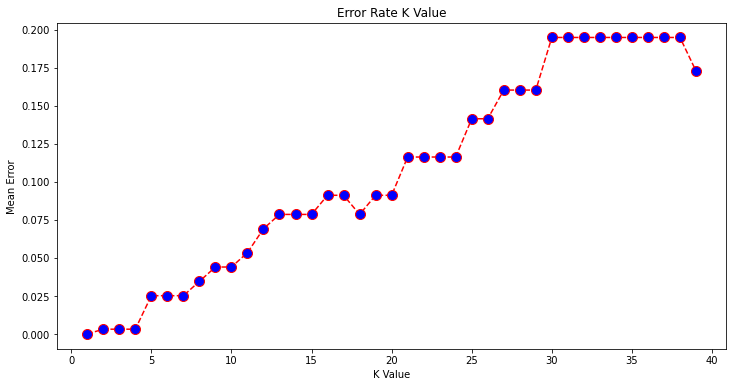

In [ ]:
#creates a list of errors
error = []

#loops 1 to 40
for i in range(1, 40):
    #knn is classified as i
    knn = KNeighborsClassifier(n_neighbors=i)
    #fits each using the training test
    knn.fit(X_train, y_train)
    #predicts using the test data
    pred_i = knn.predict(X_test)
    #appends the error rate of each k value
    error.append(np.mean(pred_i != y_test))

#uses matplotlib to plot the figure
#sets size
plt.figure(figsize=(12, 6))
#plots a line graph of the error value for each value of k
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
#title and labels
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

The graph shows the same resukt as before with 1 producing the lowest error rates and that continuing until it reaches 5 where it increases as the value of k increases more or less.

https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

Creating a listed colour map for knn classification and a classification report.

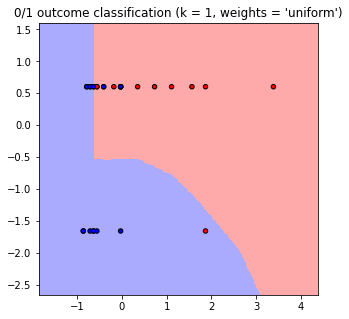

----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.50      0.33      0.40         3
           2       0.67      0.50      0.57         4

    accuracy                           0.50        10
   macro avg       0.52      0.50      0.49        10
weighted avg       0.54      0.50      0.50        10

----------------------------------------------------------------------
Accuracy =   0.5
----------------------------------------------------------------------


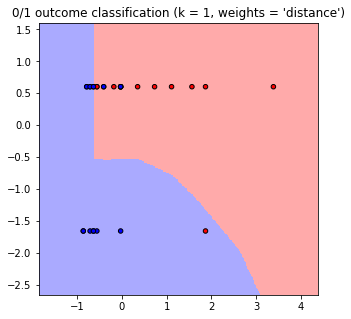

----------------------------------------------------------------------
Classification report
----------------------------------------------------------------------

               precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.50      0.33      0.40         3
           2       0.67      0.50      0.57         4

    accuracy                           0.50        10
   macro avg       0.52      0.50      0.49        10
weighted avg       0.54      0.50      0.50        10

----------------------------------------------------------------------
Accuracy =   0.5
----------------------------------------------------------------------
For best accuracy use k =  1


In [ ]:
# filter warnings
warnings.filterwarnings("ignore")

def accuracy(k, X_train, y_train, X_test, y_test):
    '''
    compute accuracy of the classification based on k values
    '''
    # instantiate learning model and fit data
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # predict the response
    pred = knn.predict(X_test)

    # evaluate and return  accuracy
    return accuracy_score(y_test, pred)

def classify_and_plot(X, y):
    '''
    split data, fit, classify, plot and evaluate results
    '''
    # split data into training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 41)

    # init vars
    n_neighbors = 1
    h           = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#0000FF'])

    rcParams['figure.figsize'] = 5, 5
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X_train, y_train)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        fig = plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points, x-axis = 'pH', y-axis = "temprature" maybe
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("0/1 outcome classification (k = %i, weights = '%s')" % (n_neighbors, weights))
        plt.show()
        fig.savefig(weights +'.png')

        # evaluate
        y_expected  = y_test
        y_predicted = clf.predict(X_test)

        # print results
        print('----------------------------------------------------------------------')
        print('Classification report')
        print('----------------------------------------------------------------------')
        print('\n', classification_report(y_expected, y_predicted))
        print('----------------------------------------------------------------------')
        print('Accuracy = %5s' % round(accuracy(n_neighbors, X_train, y_train, X_test, y_test), 3))
        print('----------------------------------------------------------------------')


# load your data

names = list(df.columns)

# we only take the best two features and prepare them for the KNN classifier
rows_nbr = 30 # data.shape[0]
X_prime  = np.array(df.iloc[:rows_nbr, [1,5]])
X = preprocessing.scale(X_prime)
y        = np.array(df.iloc[:rows_nbr, 7])

# classify, evaluate and plot results
classify_and_plot(X, y)

#verifying once again that k = 1
best_n_neighbours = np.argmax(np.array([accuracy(k, X_train, y_train, X_test, y_test) for k in range(1, int(rows_nbr/2))])) + 1
print('For best accuracy use k = ', best_n_neighbours)

Unsure why this time the results for K are different but still produces k = 1 as the best knn k value. Compares different columns I believe its pH and temprature. Also outputs classification reports for this data. As you can see from the listed colour maps it groups the like together for k. The same output will be present for uniform and distance graphs this time.

https://stackoverflow.com/questions/56153726/plot-k-nearest-neighbor-graph-with-8-features




## Extra

Some stuff just for fun

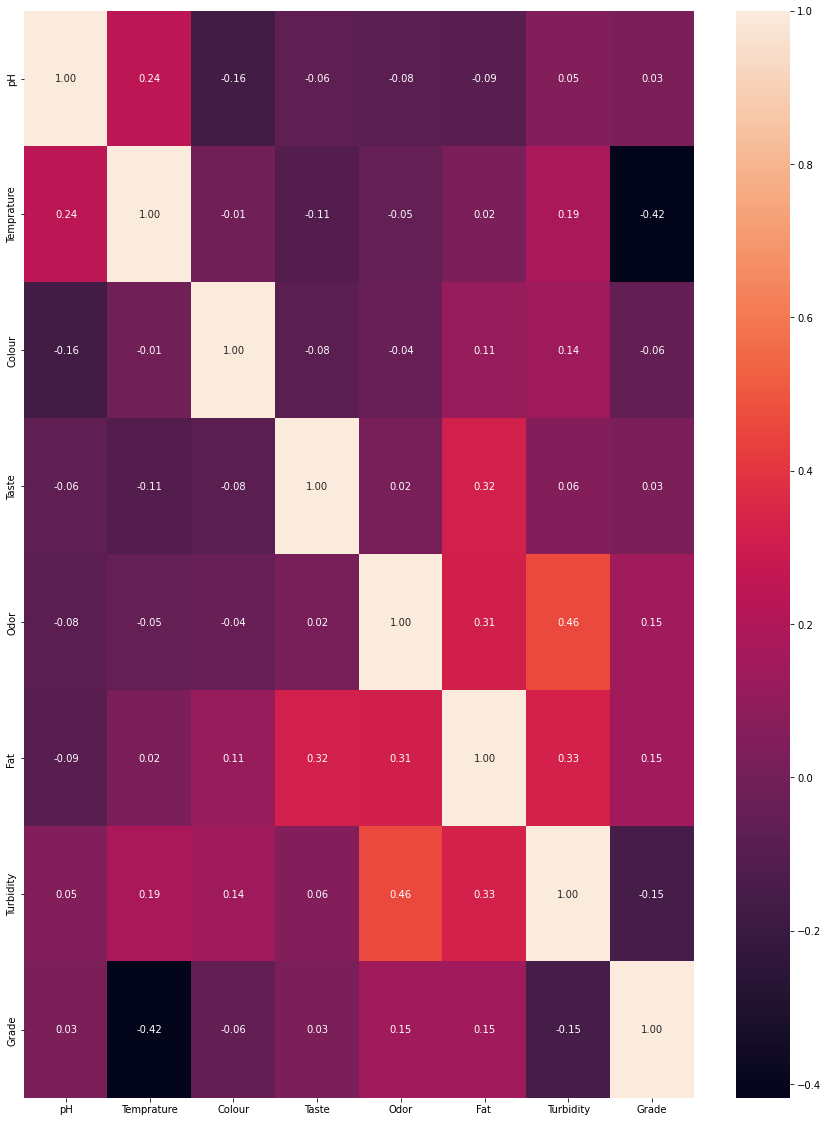

In [ ]:
def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features
    '''
    # init figure size
    rcParams['figure.figsize'] = 15, 20
    fig = plt.figure()
    #creates heat map
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    #shows
    plt.show()
    #saves the image
    fig.savefig('corr.png')
#heat map correlation between columns of the dataframe
plot_correlation(df)

The correlation matrix provides an insight into how the different columns are correlated. And just looks nice

## Results

I think the project was quite successful.
The decision tree created had almost perfect accuracy.
The random forests were also very accurate in their predictions.
Cross validation and train/test ending up being very effective with answers in the mid eighties to low nineties.
KNN is still slighlty up in the air for me with it producing different accuracy readings possibly due to one over fititng.

I was most impressed with the decision tree and think it makes the most sense for the project.

## Reccomendations
As stated I believe the project was quite successful and there isn't a huge amount I would change however, I would look into KNN further to figure out the root of the problem and potentially get a better answer more concrete answer. I was happy with the other methods but given more time to experiment some interesting things I believe I could have tried was user input and conversion for the random forest, make a generator that generated random samples of milk to test and just improve what is already there.

## Conclusion
Final remarks is the project was a success. Decision tree and K Fold worked very well, KNN could use more work but still produced interesting results.